# A Titanic Problem

So you like saying the words data science, and now you find yourself wondering how you would even start a data science problem. Well look no further aspiring nerd. This notebook will walk you through everyone's favorite introductory data science problem: predicting survivors and ... not so survivors aboard the Titanic. We'll use a data set obtained from kaggle.com/c/titanic. Our hope is that this notebook will provide some visibility into the mysteries of data science.

In [2]:
# get imports out of the way upfront
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn import metrics

## Data Understanding

#### Import Data
To get things started, we'll first take a look at the raw data, as well as some statistics about each variable (column)

In [3]:
# import the data into a pandas dataframe 
data = pd.read_csv(os.path.join(os.getcwd(), 'data', 'train.csv'))

# look at the raw data
data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


#### Get Statistics
Take a look at general statistics for each variable using panda's describe method

In [150]:
print data.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### Variable Descriptions
With a little bit of searching we found the following variable descriptions:

    survival:  Survival (0 = No; 1 = Yes)                
    pclass:    Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)                
    name:      Name
    sex:       Sex
    age:       Age
    sibsp:     Number of Siblings/Spouses Aboard
    parch:     Number of Parents/Children Aboard
    ticket:    Ticket Number
    fare:      Passenger Fare
    cabin:     Cabin
    embarked:  Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)                

## Data Cleanse
#### Missing Data
Right off the bat we notice an issue with our data. Age only has 714 observations, while every other numerical variable has 891 observations. There are clearly a large number of missing values. Rather than drop these rows, lets replace them with the median value for the variable. 

Note: we may later decide to drop these rows later, but we'll try salvaging them for now.

In [151]:
# fillna is a method that will replace missing values with given input
data.Age = data.Age.fillna(data.Age.median())
print data.describe()

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


## Data Exploration and Visualization
#### Survival Breakdown
Let's now take a look at the breakdown of those that survived and those that didn't. Can we make any interesting observations through a visual analysis? First, let's take a look down at the breakdown of total survivors and non survivors.

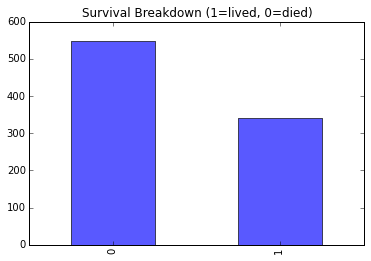

In [152]:
# specifies the parameters of our graphs
plt.figure(figsize=(6,4))
data.Survived.value_counts().plot(kind='bar', color='blue', alpha=.65)
plt.title("Survival Breakdown (1=lived, 0=died)")


#### Survival linked with age?
Now we'll look and see if age has anything to do with who lived and died. (i.e. are the age distributions noticeably different between survivors and non survivors?)

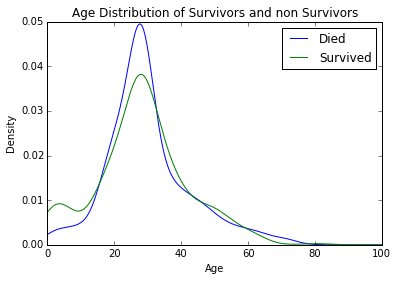

In [153]:
plt.figure(figsize=(6,4))
# plots a kernel density estimate of the subset of the 1st class passangers's age
data.Age[data.Survived == 0].plot(kind='kde')    
data.Age[data.Survived == 1].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution of Survivors and non Survivors")
plt.xlim([0,100])
# sets our legend for our graph.
plt.legend(('Died', 'Survived'),loc='best')

Ok, those look pretty similar, there is definitely a spike of very your survivors. This is what we would expect, the very young were saved. However, we didn't find anything radically different between the two distributions.
#### Survival linked with ticket fee
This time, we'll see if the fare that passengers paid has any difference in distribtuion between the survivors and non survivors.

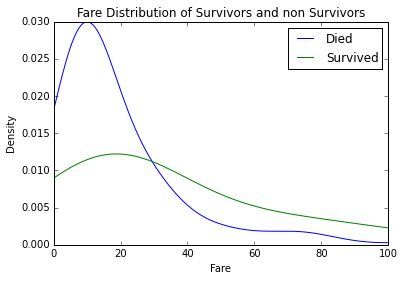

In [154]:
plt.figure(figsize=(6,4))
# plots a kernel density estimate of the subset of the 1st class passangers's age
data.Fare[data.Survived == 0].plot(kind='kde')    
data.Fare[data.Survived == 1].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Fare")    
plt.title("Fare Distribution of Survivors and non Survivors")
plt.xlim([0,100])
# sets our legend for our graph.
plt.legend(('Died', 'Survived'),loc='best')

Wow! That's interesting. It seems that those who paid more had a better chance of surviving than those who paid less. We can tell this by the right tail of the green line, which stays higher as we move towards 100 on the x axis.
#### Survival linked with sex, as in male or female
There's probably even more interesting insights to be found! Let's take a look now at the differences between male and female survivors and non survivors. First we'll perform the same bar chart plot that we first created (comparing the count of survivors and non survivors), but this time we'll filter for only males. We'll then create a second bar chart, this time only for females. I wonder if they're different?

(0, 500)

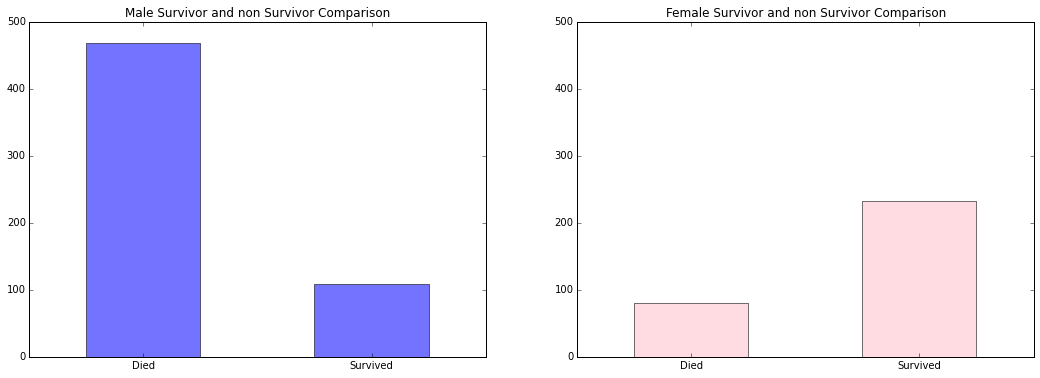

In [155]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
data.Survived[data.Sex == 'male'].value_counts().sort_index().plot(kind='bar',label='Male', color='blue', alpha=0.55)
plt.title("Male Survivor and non Survivor Comparison")
ax1.set_xticklabels(["Died","Survived"], rotation=0)
ax2 = fig.add_subplot(122)
data.Survived[data.Sex == 'female'].value_counts().sort_index().plot(kind='bar',label='Female', color='pink', alpha=0.55)
plt.title("Female Survivor and non Survivor Comparison")
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_ylim(0,500)


Fascinating. Among men, there were clearly more who died than who survived, but among women, there were clearly more who survived than who died.

So for we've made two very important observations: 
(1) that those who paid a higher fare were of more abundance amongst survivers than non survivers
(2) that women were more likely to suvive than to die, and men were moe like to die than survive
#### Survival linked with sex linked with class
Armed with this new understanding, let's combine both obersvations let's compare survivors and non survivors amongst males and females in the high and low class. We'll define high class as anyone in pclass 1 or 2, and low class as anyone in pclass 3.

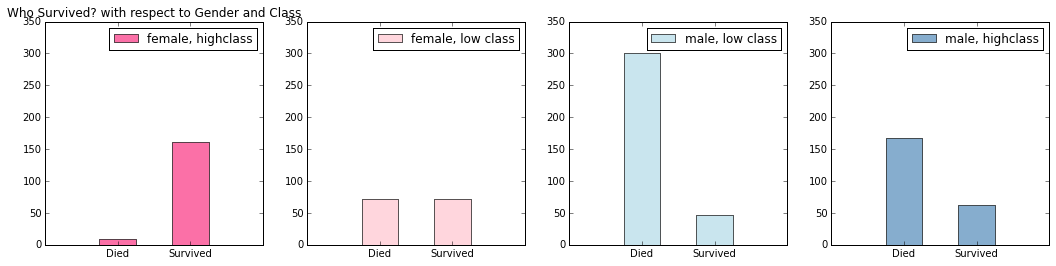

In [156]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)
female_highclass = data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
ax1.set_ylim(0,350)
ax1.invert_xaxis()
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142)
female_lowclass = data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
ax2.set_ylim(0,350)
plt.legend(loc='best')

ax3=fig.add_subplot(143)
male_lowclass = data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
ax3.set_ylim(0,350)
plt.legend(loc='best')

ax4=fig.add_subplot(144)
male_highclass = data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
ax4.set_ylim(0,350)
plt.legend(loc='best')

NOW WE'RE COOKING WITH GAS FOLKS! It wasn't just females that had a greater proportion that survived than died, it was the upperclass females. This is obvious when you compare the first and second bar charts. For men, it looks like the proportionality of survivors vs non survivors was more favorable amongs the high class, but still a rotten deal.

The observations we have made thus far are interesting, but they are exactly what I called them, observations. They don't give us any predictive power, as interesting as they are. So let's use the magic of machine learning to create new information about this data, information that may possibly allow us to predict whether someone will live or die.

## Supervised Machine Learning

First we'll take a very simple stab at creating an algorithm that will predict who will live or die, based on their cabin class, sex, age, count of siblinngs/spouses on board, count of parents/children on board, ticket fare, and port of embarkation.
### Data Prep
#### Make sex binary
The first step to create our algorithm is to prepare the data to be used in training the algorithm. Namely, any categorical variables have to be transformed into binary values. Our first problem variable is sex, which currently has two variables: male, female. These need to be converted into 0,1. 0 will represent females, males will be represented by 1.

In [157]:
data.Sex = data['Sex'].apply(lambda x: 1 if x=='male' else 0)
print data.Sex.head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    0
9    0
Name: Sex, dtype: int64


#### Dummy Variables
Next we'll create dummy variables for pclass and embarked. Dummy variables are how we represent categorical variables with more than 2 values. For example, pclass has 3 values: 1, 2, and 3. This one variable will be converted into 3 seperate variables: pclass1, pclass2, and pclass3. Each variable will be binary.

In [158]:
dummies = []
cols = ['Pclass','Embarked']
for col in cols:
    dummies.append(pd.get_dummies(data[col],prefix=col))

data_dummies = pd.concat(dummies, axis=1)

data_dummies.head(5)

,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,0,1
1,1,0,0,1,0,0
2,0,0,1,0,0,1
3,1,0,0,0,0,1
4,0,0,1,0,0,1


Now combine new dummy variables with the orginial data and drop their corrisponding columns

In [159]:
data = pd.concat((data,data_dummies),axis=1).drop(['Pclass','Embarked'],axis=1)
data.head(5)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,0,0,1,0,0,1


#### Drop unusable (for now) fields
Finally, we'll drop those variables that are not continuous or categorical. We could maybe use these later on, but for now let's assume that someone's name has no correlation with whether they died or not on the Titanic.

In [160]:
data = data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
data.head(5)

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,1,22,1,0,7.2500,0,0,1,0,0,1
1,1,0,38,1,0,71.2833,1,0,0,1,0,0
2,1,0,26,0,0,7.9250,0,0,1,0,0,1
3,1,0,35,1,0,53.1000,1,0,0,0,0,1
4,0,1,35,0,0,8.0500,0,0,1,0,0,1


### Model Creation
Great! We're ready to create your first algorithm, please keep your excited screams to a minimum. To accomplish this we'll use the LogisticRegression function from python's sklearn library.

In [161]:
survived = data.Survived.values
data = data.drop(['Survived'],axis=1)

model = LogisticRegression()
model = model.fit(data,survived)
round(model.score(data,survived),3)


0.808

## Evaluation

Okay, .81 seems pretty good for the accuracy of our model. This means that the algorithm correctly chose survived or died 80.8% of the time. One issue though, that accuracy was obtained from the same data that we trained on. INSERT FLASHING RED LIGHTS. You can never ever ever ever ever trust the accuracy score of a model that is evaluated on the same data that is was trained on. We want to create an alogithm that works for future data, not just what has happened in the past.

To accomplish this, lets split the data into a training and a validation set. We'll train on the training data, and then validate that the algorithm perform well on the validation set.

In [162]:
# randomly split the data into training and validation partitions
X_train, X_test, y_train, y_test = train_test_split(data, survived, test_size=0.3, random_state=0)
# create and traing a new model
model2 = LogisticRegression()
model2 = model2.fit(X_train, y_train)
# predict class labels for the test set
predicted = model2.predict(X_test)
# generate class probabilities
probs = model2.predict_proba(X_test)
# generate evaluation metrics
print round(metrics.accuracy_score(y_test, predicted),3)

0.806


Wahoo, our model extends well to new data that it has not seen before. But being right 80.6% of the time isn't the whole story. What if this was a model that determined if someone had cancer or not? Telling someone they have cancer when they don't when they don't would be bad, but not finding that someone has cancer when they do would deny them ability to obtain medical attention that could save their life. We gain visibility into this dillema using a confusion matrix.

In [163]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[144  24]
 [ 28  72]]
             precision    recall  f1-score   support

          0       0.84      0.86      0.85       168
          1       0.75      0.72      0.73       100

avg / total       0.80      0.81      0.81       268



Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

In english, precision is the percent of times we are right when we we predict a passenger survived. Recall is the percentage of how many of the actual survivors we predicted accurately.